In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = '/content/drive/My Drive/KDEF/Train'
test_path = '/content/drive/My Drive/KDEF/Test'

In [ ]:
print('Train:')
print(f'Number of Surprised images : {len(os.listdir(os.path.join(train_path, "Surprised")))}')
print(f'Number of Afraid images : {len(os.listdir(os.path.join(train_path, "Afraid")))}')
print(f'Number of Disgusted images : {len(os.listdir(os.path.join(train_path, "Disgusted")))}')
print(f'Number of Angry images : {len(os.listdir(os.path.join(train_path, "Angry")))}')
print(f'Number of Neutral images : {len(os.listdir(os.path.join(train_path, "Neutral")))}')
print(f'Number of Sad images : {len(os.listdir(os.path.join(train_path, "Sad")))}')
print('-----------------------------------------------')
print('Test:')
print(f'Number of Surprised images : {len(os.listdir(os.path.join(test_path, "Surprised")))}')
print(f'Number of Afraid images : {len(os.listdir(os.path.join(test_path, "Afraid")))}')
print(f'Number of Disgusted images : {len(os.listdir(os.path.join(test_path, "Disgusted")))}')
print(f'Number of Angry images : {len(os.listdir(os.path.join(test_path, "Angry")))}')
print(f'Number of Neutral images : {len(os.listdir(os.path.join(test_path, "Neutral")))}')
print(f'Number of Sad images : {len(os.listdir(os.path.join(test_path, "Sad")))}')

Train:
Number of Surprised images : 630
Number of Afraid images : 631
Number of Disgusted images : 630
Number of Angry images : 630
Number of Neutral images : 630
Number of Sad images : 630
-----------------------------------------------
Test:
Number of Surprised images : 69
Number of Afraid images : 70
Number of Disgusted images : 70
Number of Angry images : 70
Number of Neutral images : 70
Number of Sad images : 69


In [ ]:
BATCH_SIZE = 64
IMG_SIZE = (250, 250)

datagen = ImageDataGenerator(rescale=1./255)

train_dataset = datagen.flow_from_directory(train_path,
                                            shuffle=True,
                                            batch_size=BATCH_SIZE,
                                            target_size=IMG_SIZE,
                                            seed=42)

validation_dataset = datagen.flow_from_directory(test_path,
                                                shuffle=True,
                                                batch_size=BATCH_SIZE,
                                                target_size=IMG_SIZE,
                                                seed=42)

Found 4410 images belonging to 7 classes.
Found 488 images belonging to 7 classes.


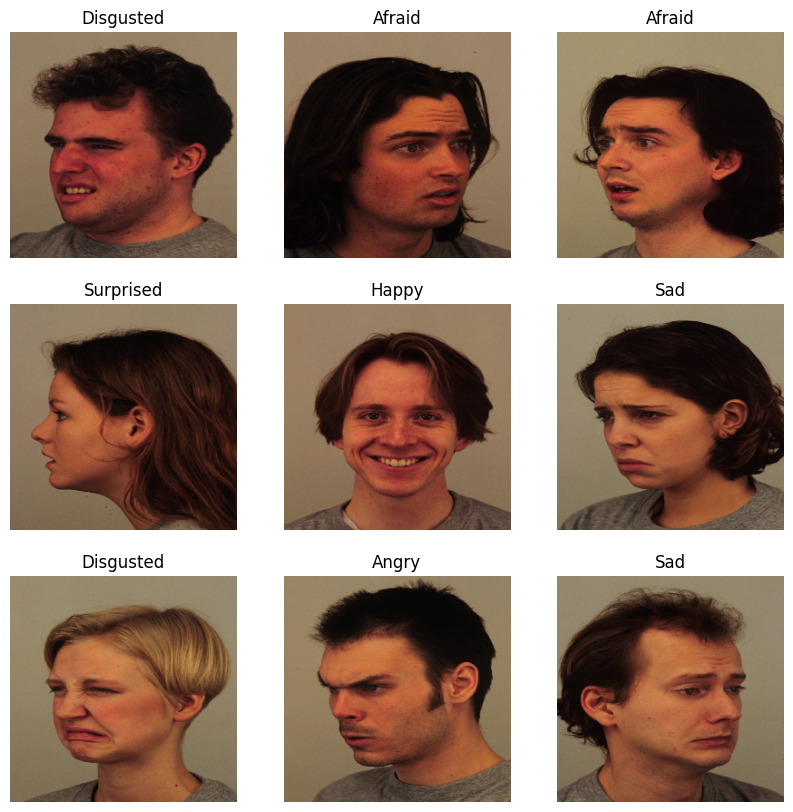

In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
top_model = base_model.output
top_model = Flatten(name="flatten")(top_model)
top_model = Dense(1024, activation='relu')(top_model)
top_model = Dropout(0.2)(top_model)
output_layer = Dense(7, activation='softmax')(top_model)

# Group the convolutional base and new fully-connected layers into a Model object.
MobileNet_model = tf.keras.models.Model(inputs=base_model.input, outputs=output_layer)

In [ ]:
MobileNet_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           min_delta=0,
                           patience=5,
                           mode='min')

In [ ]:
n_epochs = 30

MobileNet_history = MobileNet_model.fit(train_dataset,
                                        batch_size=BATCH_SIZE,
                                        epochs=n_epochs,
                                        validation_data=validation_dataset,
                                        steps_per_epoch=train_dataset.samples // BATCH_SIZE,
                                        validation_steps=validation_dataset.samples // BATCH_SIZE,
                                        callbacks=[early_stop],)

Epoch 1/30
68/68 [==============================] - 2042s 30s/step - loss: 12.1067 - accuracy: 0.2331 - val_loss: 1.6530 - val_accuracy: 0.3571
Epoch 2/30
68/68 [==============================] - 39s 579ms/step - loss: 1.5750 - accuracy: 0.3833 - val_loss: 1.4646 - val_accuracy: 0.4397
Epoch 3/30
68/68 [==============================] - 40s 589ms/step - loss: 1.3171 - accuracy: 0.4913 - val_loss: 1.3498 - val_accuracy: 0.4955
Epoch 4/30
68/68 [==============================] - 40s 593ms/step - loss: 1.1579 - accuracy: 0.5575 - val_loss: 1.2136 - val_accuracy: 0.5491
Epoch 5/30
68/68 [==============================] - 39s 575ms/step - loss: 0.9744 - accuracy: 0.6240 - val_loss: 1.0954 - val_accuracy: 0.6004
Epoch 6/30
68/68 [==============================] - 39s 576ms/step - loss: 0.8521 - accuracy: 0.6700 - val_loss: 1.0655 - val_accuracy: 0.6183
Epoch 7/30
68/68 [==============================] - 40s 590ms/step - loss: 0.7511 - accuracy: 0.7078 - val_loss: 1.1106 - val_accuracy: 0.573